### **The goal in this data science project is to predict the SalePrice, given these features.**

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train =pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col='Id')
df_test =pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',index_col='Id')

# Exploratory data analysis

In [3]:
# Preview the data we're working with

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice, the target our prediction.
let's see how it distribute

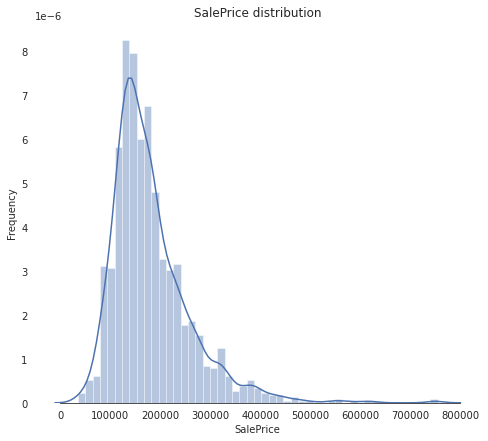

In [4]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#check the distribution
sns.distplot(df_train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [5]:
# Skew and kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Visualize some of the features in the dataset

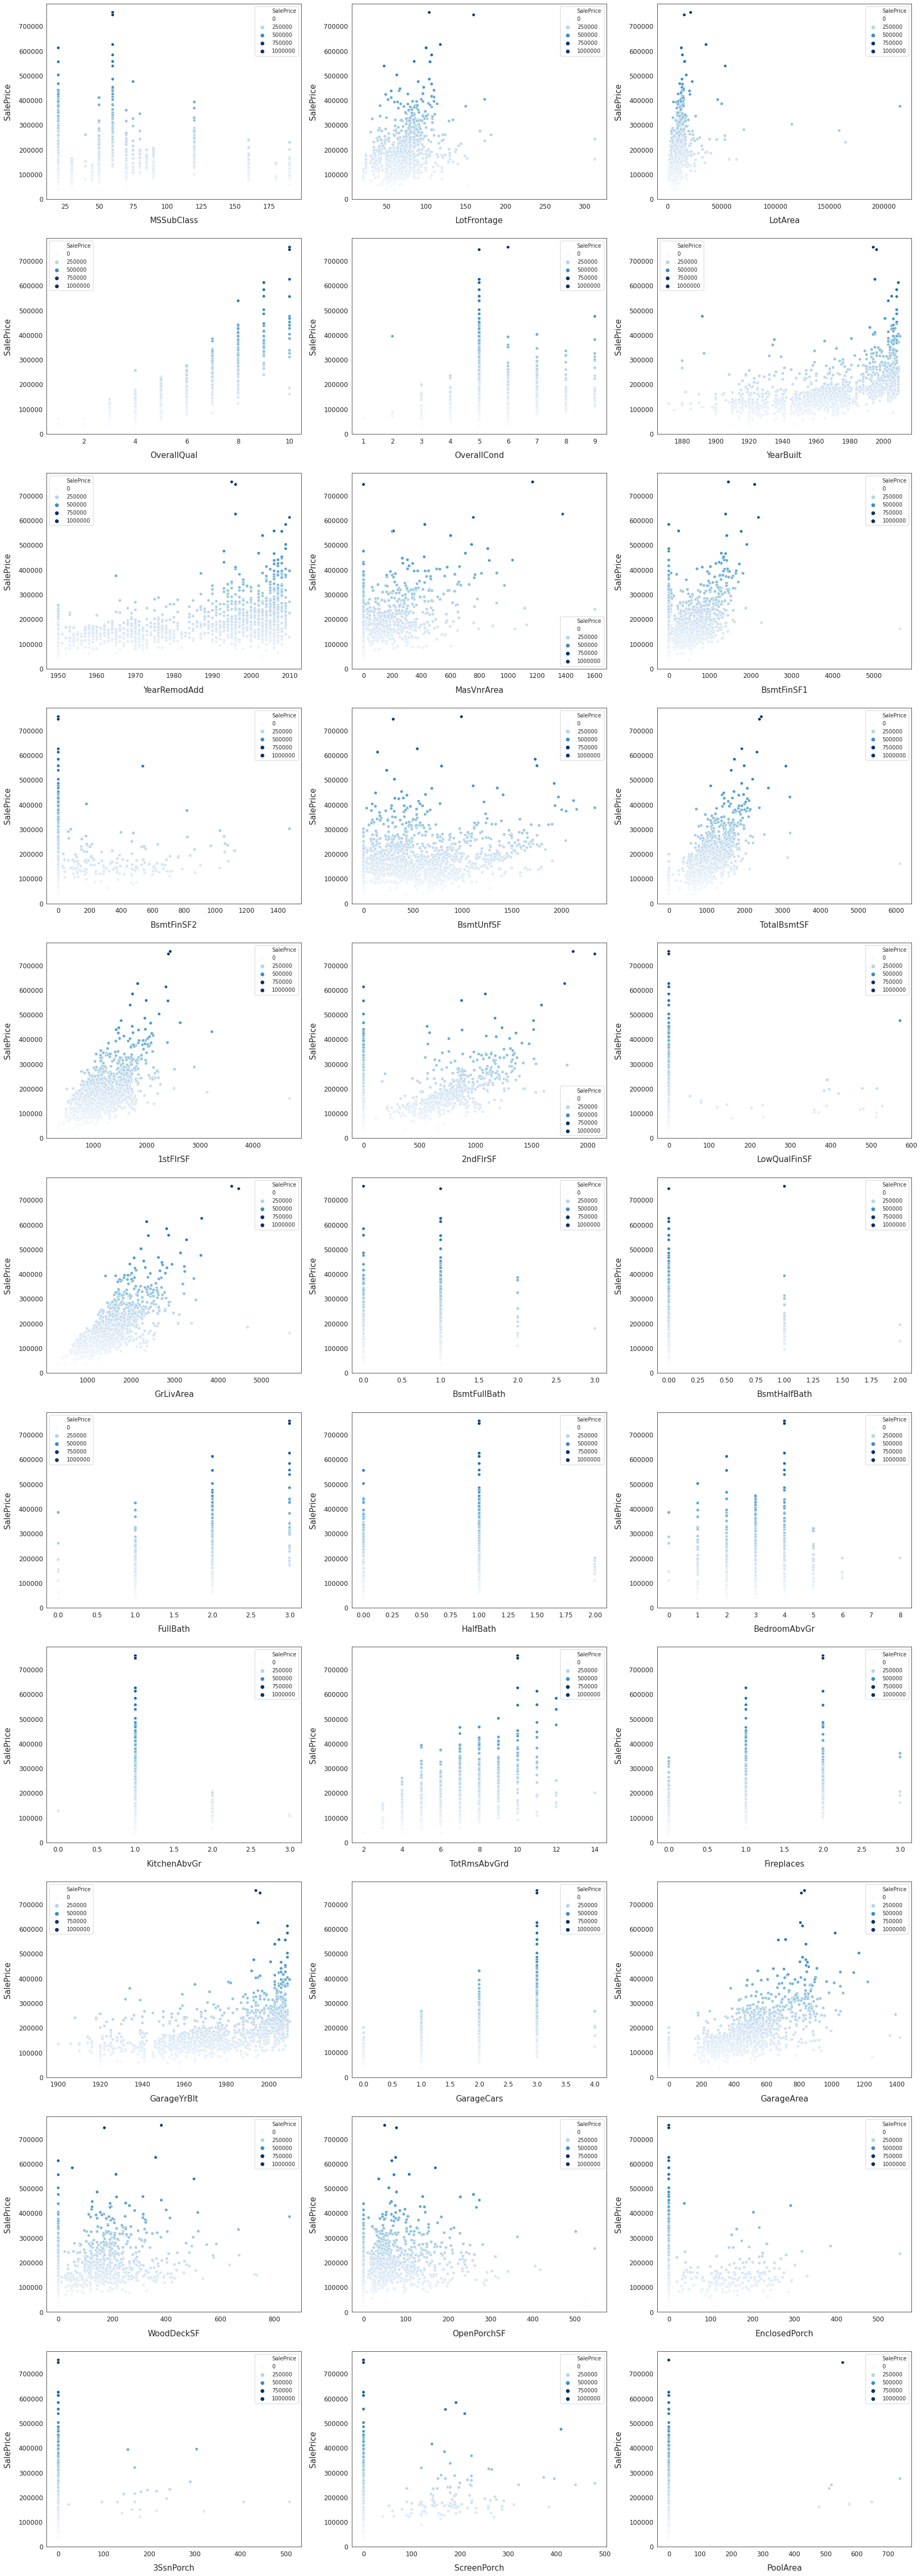

In [6]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

### let's see how the features are correlated to each other, and to SalePrice!

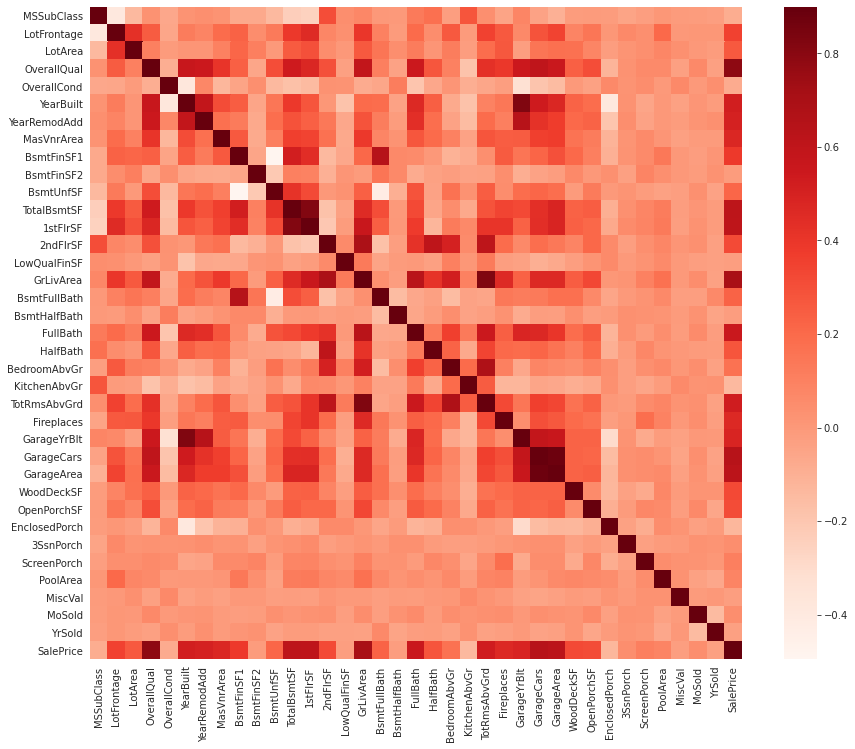

In [7]:
corr = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

how SalePrice relates to some of the features in the dataset.

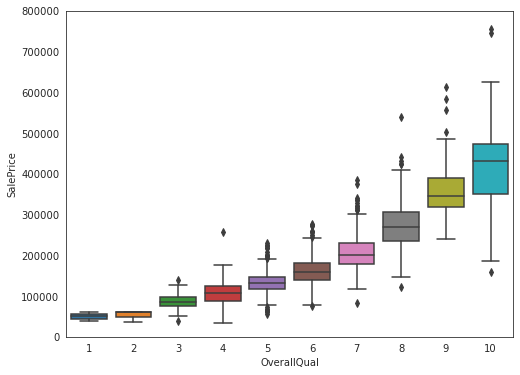

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

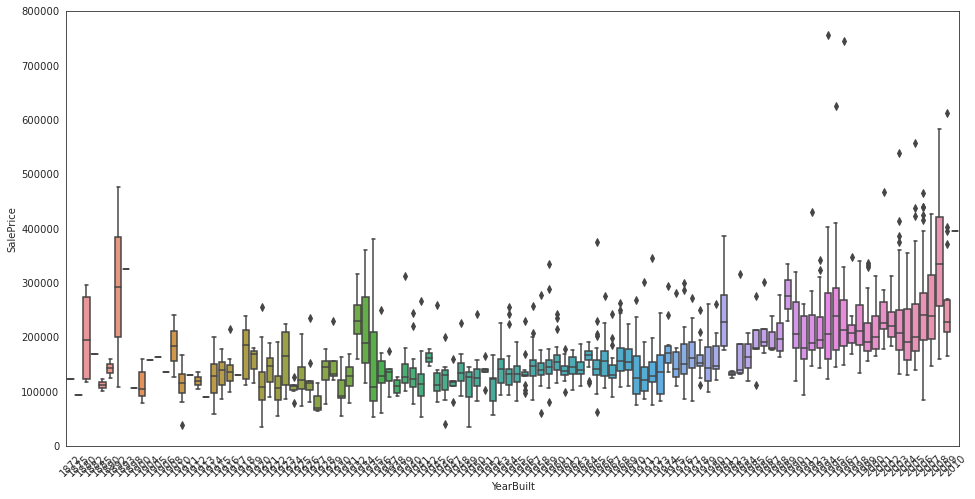

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df_train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

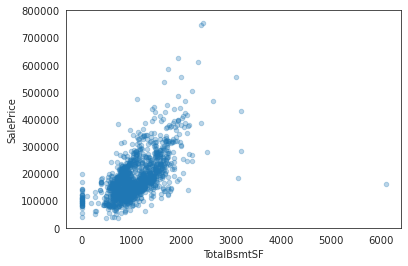

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000));

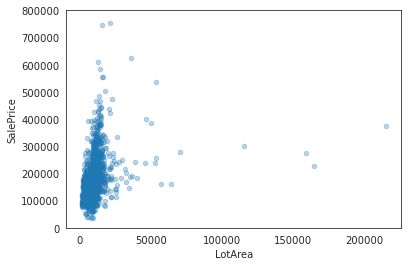

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

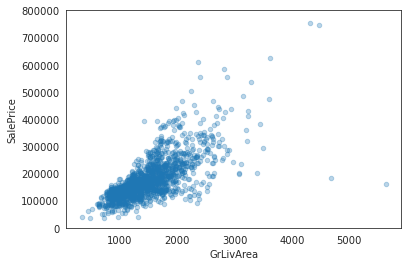

In [12]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

# Feature Engineering
let's see the SalePrice distribution once again!

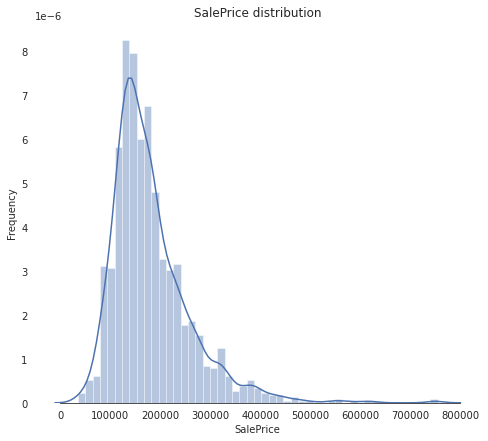

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

Based on the distribution chart above, the SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. To handle this, We can apply a log(1+x) tranform to fix the skew.

In [14]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

Let's see the distribution after the transformation

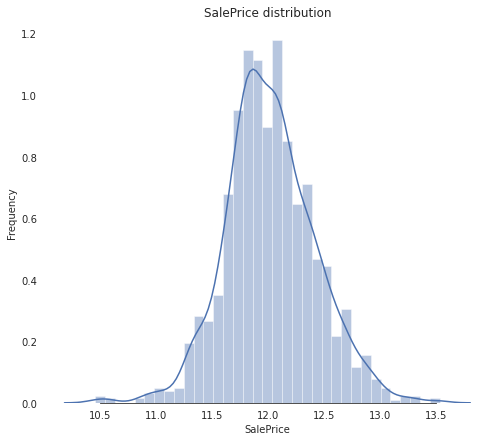

In [15]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# Data Cleaning

Based on the graph that we have seen, it appears that there are some outilers that we can remove.

In [16]:
# Remove outliers
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In the description data, it is explained that the numbers on the '**MSSubClass**' have no meaning but rather indicate a certain category code.

In [17]:
len_df_train= df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)
for col in ["MSSubClass"]:
    data_train_test[col]= df_train[col].map({20: '1-STORY 1946 & NEWER ALL STYLES' ,
                                  30:'1-STORY 1945 & OLDER' ,
                                  40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                  45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                  50:'1-1/2 STORY FINISHED ALL AGES',
                                  60:'2-STORY 1946 & NEWER',
                                  70:'2-STORY 1945 & OLDER',
                                  75:'2-1/2 STORY ALL AGES',
                                  80:'SPLIT OR MULTI-LEVEL',
                                  85:'SPLIT FOYER',
                                  90:'DUPLEX - ALL STYLES AND AGES',
                                  120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                  150:'1-1/2 STORY PUD - ALL AGES',
                                  160:'2-STORY PUD - 1946 & NEWER',
                                  180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                  190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

On the other hand, there are some numerical data read as categorical.

In [18]:
# For categorical data read as numerical data
len_df_train=df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

# maybe this information about order can help on performance
for col in ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual",
            "FireplaceQu","GarageQual","GarageCond","PoolQC"]:
    data_train_test[col]= data_train_test[col].map({"Gd": 4 , "TA": 3, "Ex": 5, "Fa":2, "Po":1})

# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

In [19]:
# For categorical data read as numerical data
len_df_train=df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

# maybe this information about order can help on performance
for col in ["BsmtFinType1", "BsmtFinType2"]:
    data_train_test[col]= data_train_test[col].map({"GLQ": 6 , "ALQ": 5, "BLQ": 4, "Rec":3, "LwQ":2, "Unf": 1, "NA": 0})

# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

let's visualize the missing value in this dataset!

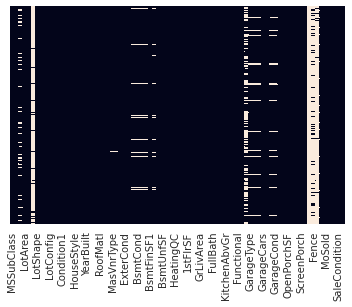

In [20]:
# visualization amount of missing data
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [21]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df_train)

PoolQC           99.59
MiscFeature      96.30
Alley            93.76
Fence            80.73
FireplaceQu      47.33
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 80, dtype: float64


let's delete column with missing value above 30%

In [22]:
# Delete column with missing value above 30%
df_train.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


check the missing value again!

In [23]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df_train)

LotFrontage      17.76
GarageType        5.56
GarageYrBlt       5.56
GarageCond        5.56
GarageQual        5.56
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 75, dtype: float64


Handling missing value with mean() for numerical data and make missing value in categorical become zero. Before doing that, first we have to merge data train and test so we could handle it easier.

In [24]:
len_df_train= df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

In [25]:
# check the data!
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2919
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   object 
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   LotShape       2917 non-null   object 
 6   LandContour    2917 non-null   object 
 7   Utilities      2915 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   int64  
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

let's visualize the missing value again

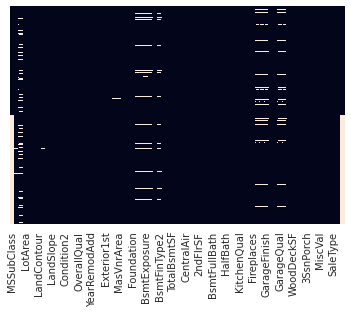

In [26]:
# visualization amount of missing data
sns.heatmap(data_train_test.isnull(),yticklabels=False,cbar=False)

In [27]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in data_train_test.columns if
                    data_train_test[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in data_train_test.columns if 
                data_train_test[cname].dtype in ['int64', 'float64']]

In [28]:
# check the categorical cols
print(categorical_cols)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [29]:
# check the numerical cols
print(numerical_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Fill up the missing value! 

In [30]:
for i in numerical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mean())
for i in categorical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])

In [31]:
#check the missing value for the last time
missing(data_train_test)

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
MSSubClass      0.0
Length: 75, dtype: float64


after we finish filling up the missing value, next step is to handle the categorical columns. In this case i use `OneHotEncoder` to handle categorical data.

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_train_test[categorical_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = data_train_test.index


# Remove categorical columns (will replace with one-hot encoding)
num_X = data_train_test.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
data_train_test = pd.concat([num_X, OH_cols], axis=1)

In [33]:
#lets check our data!
data_train_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,190,191,192,193,194,195,196,197,198,199
0,65.0,8450,7,5,2003,2003,196.0,4,3,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Let's split the data train and data test again, then we ready for bulid model.

In [ ]:
#split the data again
X_train_full= data_train_test[:len_df_train]
X_test_full= data_train_test[len_df_train:]
y_train = X_train_full['SalePrice']
X_train_full.drop(['SalePrice'],axis=1,inplace=True)
X_test_full.drop(['SalePrice'],axis=1,inplace=True)

# Build Model

To solve this problem, i use XGBOOST regression model (`XGBRegressor`)

In [ ]:
import xgboost
from xgboost import XGBRegressor
my_model_1 = XGBRegressor()

Use `cross_val_score` to evaluate model performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_model_1, X_train_full, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Let's improve our model using `RandomizedSearchCV`

In [ ]:
regressor=xgboost.XGBRegressor()

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100,200,300,400,500,600,700,800,850,900,950,1000,1100,1200,1300,1500]
max_depth = [2, 3,4,5,6,7,8,9,10,11,12,13,14,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train_full,y_train)

In [ ]:
# print the best parameter
random_cv.best_estimator_

copy the parameters above on new our model

In [ ]:
my_model_2 = XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

let's see how many our model improve!

In [ ]:
import time
start_time = time.time()
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_model_2, X_train_full, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Predict the data test!

In [ ]:
my_model_2.fit(X_train_full, y_train)
preds_test = my_model_2.predict(X_test_full)

Save the prediction in csv.

In [ ]:
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)